# Data Science and Machine Learning Exploritory Analysis
This notebook seeks to use a survey data from the [2020 Kaggle Machine Learning & Data Science Survey kaggle contest](https://www.kaggle.com/c/kaggle-survey-2020/overview) to find the best way to get a in the field. <br>

The industry-wide survey was live for 3.5 weeks in October, and captured 20,036 responses.

The angle this notebook will look to explore are the differences in South Africa, a developing country, and the Netherlands, a developed country.  

Specifically this will look at 5 different questions, these are:
1. What languages are most popular, how does this differ between countries, between experience levels and titles?
2. What language they reccomend for aspiring data scientists.
3. Saturation of machine learning in commercial applications  and how they incorporate machine learning. 
4. Do the participants use cloud computing and if so what platform do they use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kaggle_survey_2020_responses.csv')

C:\Users\Jonathan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
print(df.columns[10])

Q7_Part_4


In [24]:
df


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [23]:
for i in range(df.shape[1]):
    print(df.iloc[0, i])

Duration (in seconds)
What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++
What programming languages do you use on a regular basis? 

In [20]:
df.iloc[0, 12]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java'

In [ ]:
new_schema = ['time',
              "age",
              "gender",
              'country',
              'education',
              'title',
              'coding_experience',
              'python',
              '',
              'third_language',
              'fourth_language',
              'learn_first_reccomendation',
              
              
             ]

# Data Wrangling

The the data regularised and cleaned, the only issue I can see with it is that the headings do not reflect the question.
Therefore, it would be desirable to create new headings based on the question asked and remove the question row. The full questions will be placed in a dictionary for later querying.

# Netherlands

In [19]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


## What languages are most popular

In [28]:
df.columns[8][0:2]

'Q7'

In [100]:
def breakdown_main(question = "Q7"):
    
    if is_multiple(question) == True:
        print('works')
        dict1 = count_languages(question)
        plot_dict(dict1)
        
        

In [104]:
breakdown_main('Q8')

In [103]:
def is_multiple(questionnNumber = 'Q7'):
    """
    This method returns True if there are multiple parts to a question.
    """
    
    num_languages = 0
    for x in df.columns:
        if x[0:2] == questionnNumber:
            num_languages+=1
    if num_languages>1:
        return True
    else:
        return False

In [ ]:
def based_on_country():
    

In [96]:
def count_languages(question_number = 'Q7', df = df):
    
    """
    Creates a dictionary of different columns and their counts.
    """
    internal_dict = {}
    for x in df.columns:
        if x[0:2] == question_number:
            internal_dict[df.loc[0,x].split(" - ")[-1]] = df[x].count()
        
    
    return internal_dict

In [31]:
# Number of languages in survey
num_languages = 0
for x in df.columns:
    if x[0:2] == 'Q7':
        num_languages+=1
print(f"number of selectable languages is {num_languages}")

number of selectable languages is 13


In [34]:
columns_of_languages = [df.columns[8:8+num_languages-1]]

In [55]:
columns_of_languages = [x for x in columns_of_languages[0]]

In [56]:
columns_of_languages

['Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER']

In [66]:
df.loc[0,columns_of_languages[0]].split(' ')[-1]

'R'

In [67]:
language_count = {}

for x in columns_of_languages:
    language_count[df.loc[0,x].split(' ')[-1]] = df[x].count()
    print(x, " : ", df[x].count())

Q7_Part_2  :  4278
Q7_Part_3  :  7536
Q7_Part_4  :  3316
Q7_Part_5  :  3828
Q7_Part_6  :  3368
Q7_Part_7  :  2996
Q7_Part_8  :  263
Q7_Part_9  :  199
Q7_Part_10  :  1777
Q7_Part_11  :  2218
Q7_Part_12  :  207
Q7_OTHER  :  1946


In [68]:
language_count

{'R': 4278,
 'SQL': 7536,
 'C': 3316,
 'C++': 3828,
 'Java': 3368,
 'Javascript': 2996,
 'Julia': 263,
 'Swift': 199,
 'Bash': 1777,
 'MATLAB': 2218,
 'None': 207,
 'Other': 1946}

In [71]:
language_count.values()

dict_values([4278, 7536, 3316, 3828, 3368, 2996, 263, 199, 1777, 2218, 207, 1946])

In [73]:
x_labels=language_count.keys()

In [110]:
plot_dict1(language_count)

NameError: name 'plot_dict1' is not defined

In [105]:
def plot_dict(language_dict, df):
    """
    plot bar graph of dictionary with keys as the x labels and values as y values.
    """
    keys = list(language_dict.keys())
    # get values in the same order as keys, and parse percentage values
    vals = [float(language_dict[k]) for k in keys]
    plt.figure(figsize=(10,5))
    return sns.barplot(x=keys, y=vals) 

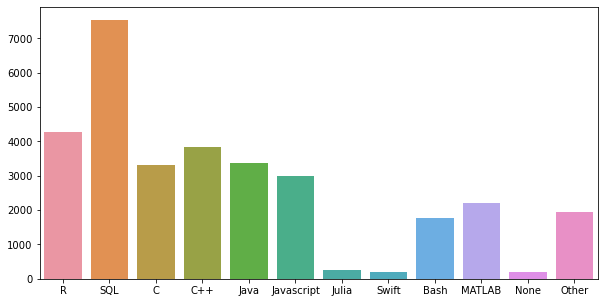

In [91]:
keys = list(language_count.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(language_count[k]) for k in keys]
plt.figure(figsize=(10,5))
sns.barplot(x=keys, y=vals)

### World wide


In [111]:
from custom_helper_functions import *

In [ ]:
plot_dict1()